In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import tweepy
import configparser

In [3]:
def scrape(words, date_since, date_end):
    db = pd.DataFrame(columns=['creation',
                               'username',
                               'description',
                               'location',
                               'following',
                               'followers',
                               'totaltweets',
                               'retweetcount',
                               'text',
                               'hashtags'])
    
    tweets = tweepy.Cursor(api.search_tweets,
                           words, lang="en",
                           since_id=date_since,
                           until=date_end,
                           tweet_mode='extended').items()
    
    list_tweets = [tweet for tweet in tweets]
    
    i = 1
    
    for tweet in list_tweets:
        creation = tweet.created_at
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
        
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
            
        ith_tweet = [creation, username, description,
                     location, following,
                     followers, totaltweets,
                     retweetcount, text, hashtext]
        db.loc[len(db)] = ith_tweet
        
        printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'scraping.csv'
    db.to_csv(filename)
    
if __name__ == '__main__':
    consumer_key = " "
    consumer_secret = " "
    access_key = " "
    access_secret = " "
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, wait_on_rate_limit = True)
    
    print("Hashtah a buscar:")
    words = input()
    print("Fecha inicio (yyyy-mm--dd):")
    date_since = input()
    print("Fecha término (yyyy-mm--dd):")
    date_end = input()
    
    scrape(words, date_since, date_end)
    print('Extracción finalizada.')

Hashtah a buscar:


 galaxys22


Fecha inicio (yyyy-mm--dd):


 2022-09-01


Fecha término (yyyy-mm--dd):


 2022-09-05


Rate limit reached. Sleeping for: 100


Extracción finalizada.


In [78]:
tt = pd.read_csv('iphone14')

In [79]:
tt.head(3)

,Unnamed: 0,creation,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2022-09-04 23:56:48+00:00,eversobling,Bling Swarovski Crystal Cases designed for iPh...,NaN,1255,601,8454,0,Scary Skull 3D Bling Swarovski Crystal iPhone ...,"['iPhone14', 'iPhone14case', 'blingbling']"
1,1,2022-09-04 23:53:42+00:00,twood3,Technology and sports,NaN,321,1605,730645,24,Midnight Blue \n#apple #iphone14 https://t.co/...,"['apple', 'iphone14']"
2,2,2022-09-04 23:51:15+00:00,MichaelsTecTalk,Tech lover and all round geek! Honest Tech Rev...,Northern Ireland,688,483,3231,0,Part of me is looking forward to the #AppleEve...,"['AppleEvent', 'iPhone14', 'AppleEvent']"


In [80]:
tt.drop(columns = 'Unnamed: 0', inplace = True)
tt['date'] = tt.creation.str.split(" ", n=1).str[0]

In [81]:
tt.shape

(94741, 11)

In [82]:
round((tt.isnull().sum()/tt.shape[0]).sort_values(ascending = False), 2)

location        0.35
description     0.14
creation        0.00
username        0.00
following       0.00
followers       0.00
totaltweets     0.00
retweetcount    0.00
text            0.00
hashtags        0.00
date            0.00
dtype: float64

In [83]:
tt.text

0        Scary Skull 3D Bling Swarovski Crystal iPhone ...
1        Midnight Blue \n#apple #iphone14 https://t.co/...
2        Part of me is looking forward to the #AppleEve...
3        iPhone 14 Pro Early Trailer @hassantheshah \nF...
4        iPhone 14 Pro Early Trailer @hassantheshah \nF...
                               ...                        
94736    #AppleEvent #iPhone \n\nthe great mystery that...
94737    I'm Super Excited for the iPhone 14 Pro Max .....
94738    Apple leaked this 😁😁😁 #iPhone14 https://t.co/0...
94739    Really interested to see what Apple has to off...
94740    3 days to go. Who’s excited? 🚨🚨#AppleEvent #iP...
Name: text, Length: 94741, dtype: object

In [84]:
def saltos_linea(texto):
    return texto.replace("\n","")
def hashtags(texto):
    return texto.replace("#", "")


def usuario_url(texto):
    nuevo_texto = []
    for car in texto.split(" "):
        car = '@user' if car.startswith('@') and len(car) > 1 else car
        car = 'http' if car.startswith('http') else car
        nuevo_texto.append(car)
    return " ".join(nuevo_texto)

In [85]:
tt['text_clean'] = tt['text'].apply(hashtags)

In [86]:
tt['text_clean'] = tt['text_clean'].apply(saltos_linea)

In [87]:
tt['text_clean'] = tt['text_clean'].apply(usuario_url)

In [88]:
tt.text_clean

0        Scary Skull 3D Bling Swarovski Crystal iPhone ...
1                        Midnight Blue apple iphone14 http
2        Part of me is looking forward to the AppleEven...
3        iPhone 14 Pro Early Trailer @user Feel free to...
4        iPhone 14 Pro Early Trailer @user Feel free to...
                               ...                        
94736    AppleEvent iPhone the great mystery that will ...
94737    I'm Super Excited for the iPhone 14 Pro Max .....
94738                  Apple leaked this 😁😁😁 iPhone14 http
94739    Really interested to see what Apple has to off...
94740    3 days to go. Who’s excited? 🚨🚨AppleEvent iPho...
Name: text_clean, Length: 94741, dtype: object

In [89]:
import re
import emoji
import string

# Limpio los tweets de carácteres extraños:
def clean(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text_clean = emoji_pattern.sub(r'', text)    
    text_clean2 = text_clean.lower()      
    text_clean3 = text_clean2.rstrip()    
    text_clean4 = text_clean3.lstrip()  
    return text_clean4

In [90]:
tt['text_clean'] = tt['text_clean'].apply(clean)

In [91]:
# Me aseguro de que no hayan duplicados:
tt.drop_duplicates(subset=["text_clean"], keep='first', inplace = True)
tt.shape

(17423, 12)

In [270]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Etiqueto datos con modelo ro-bert-a:

roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

# Defino mi función para análisis de sentimiento que incluye tokenización como paso previo:
def tweet_proc(text):
    encoded_tweet = tokenizer(text, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

In [93]:
# Debo hacer particiones para que no quede tan pesado al ejecutar:
tt_part1 = tt[:2000]
tt_part1['sent_score'] = tt_part1['text_clean'].apply(tweet_proc)

In [94]:
tt_part2 = tt[2000:4000]
tt_part2['sent_score'] = tt_part2['text_clean'].apply(tweet_proc)

In [95]:
tt_part3 = tt[4000:6000]
tt_part3['sent_score'] = tt_part3['text_clean'].apply(tweet_proc)

In [96]:
tt_part4 = tt[6000:8000]
tt_part4['sent_score'] = tt_part4['text_clean'].apply(tweet_proc)

In [97]:
tt_part5 = tt[8000:10000]
tt_part5['sent_score'] = tt_part5['text_clean'].apply(tweet_proc)

In [98]:
tt_part6 = tt[10000:12000]
tt_part6['sent_score'] = tt_part6['text_clean'].apply(tweet_proc)

In [99]:
tt_part7 = tt[12000:14000]
tt_part7['sent_score'] = tt_part7['text_clean'].apply(tweet_proc)

In [100]:
tt_part8 = tt[14000:16000]
tt_part8['sent_score'] = tt_part8['text_clean'].apply(tweet_proc)

In [101]:
tt_part9 = tt[16000:]
tt_part9['sent_score'] = tt_part9['text_clean'].apply(tweet_proc)

In [274]:
# Consolido mis particiones ya analizadas:
tt = pd.concat([tt_part1, tt_part2, tt_part3, tt_part4, tt_part5, tt_part6, tt_part7, tt_part8, tt_part9])

# Creando columnas por sentimiento:
def neg_score(text):
    return text[0]
tt['neg_score'] = tt['sent_score'].apply(neg_score)

def neu_score(text):
    return text[1]
tt['neu_score'] = tt['sent_score'].apply(neu_score)

def pos_score(text):
    return text[2]
tt['pos_score'] = tt['sent_score'].apply(pos_score)

# Defino target. Con una prob pos >= 0.7 diré que son tweets positivos, y lo mismo para negativos. El resto los tomaré como tweets neutros:
tt['target'] = np.where(tt['pos_score'] > 0.65, 1,
                              np.where(tt['neg_score'] > 0.65, -1,
                                       0))

In [103]:
# Me quedaré sólo con las columnas de interés:
df_important = tt[['text','date','text_clean','target']]
df_important.head(3)

,text,date,text_clean,target
0,Scary Skull 3D Bling Swarovski Crystal iPhone ...,2022-09-04,scary skull 3d bling swarovski crystal iphone ...,0
1,Midnight Blue \n#apple #iphone14 https://t.co/...,2022-09-04,midnight blue apple iphone14 http,0
2,Part of me is looking forward to the #AppleEve...,2022-09-04,part of me is looking forward to the appleeven...,0


In [106]:
# Guardo todos los datos etiquetados en un csv para no tener que ejecutar cada vez que se me reinicie el kernel:

df_important.to_csv('total_tweets.csv', index = False)

In [168]:
df_important = pd.read_csv('./total_tweets.csv')

In [169]:
# Extraeré 600 tweets de cada sentimiento para revisarlos manualmente y entrenar modelo:
df_important_neutral = df_important[df_important['target'] == 0].sample(n = 800)
df_important_positive = df_important[df_important['target'] == 1].sample(n = 800)
df_important_negative = df_important[df_important['target'] == -1].sample(n = 800)

In [170]:
df_muestra_important = pd.concat([df_important_neutral, df_important_positive, df_important_negative])
df_muestra_important.shape

(2400, 4)

In [171]:
# Ahora lo paso a un excel para una revisión manual:
df_muestra_important.to_excel('muestra_modelo.xlsx', index = False)

In [203]:
# Importo tweets manualmente arreglados:
tt_modelo = pd.read_excel('./muestra_modelo.xlsx')
tt_modelo.head()

,text,date,text_clean,target
0,Apple Watch series 8 #AppleEvent https://t.co/...,2022-09-07,apple watch series 8 appleevent http,0
1,@delicate_onyx The meme king himself always ha...,2022-09-03,@user the meme king himself always having some...,0
2,#AppleEvent #iPhone14 #AppleWatchPro #AppleWat...,2022-09-07,appleevent iphone14 applewatchpro applewatchul...,0
3,Apple Iphone 14 Pro renders from Spigen Insta ...,2022-09-05,apple iphone 14 pro renders from spigen insta ...,0
4,Does it make more sense for #Apple to revive t...,2022-09-03,does it make more sense for apple to revive th...,0


In [204]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
def stop_words_tokenize(data):
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(data)
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

In [205]:
tt_modelo['text_stop_words_tokenize'] = tt_modelo['text_clean'].apply(stop_words_tokenize)

In [206]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stem(lista):
    stemmer = PorterStemmer()
    new_lista_stem = []
    for word in lista:
        a = stemmer.stem(word)
        new_lista_stem.append(a)
    return new_lista_stem

In [207]:
tt_modelo['text_stop_words_tokenize_stem'] = tt_modelo['text_stop_words_tokenize'].apply(stem)

In [209]:
def unir(text):
    return ' '.join(text)

tt_modelo['text_junto'] = tt_modelo['text_stop_words_tokenize_stem'].apply(unir)
tt_modelo['text_junto'].head()

0                       appl watch seri 8 appleev http
1    @ user meme king alway someth trend bbnaija ip...
2    appleev iphone14 applewatchpro applewatchultra...
3    appl iphon 14 pro render spigen insta handl re...
4    make sens appl reviv plu brand drop max regula...
Name: text_junto, dtype: object

In [210]:
tt_modelo = tt_modelo[['text_junto','target']]
tt_modelo.head()

,text_junto,target
0,appl watch seri 8 appleev http,0
1,@ user meme king alway someth trend bbnaija ip...,0
2,appleev iphone14 applewatchpro applewatchultra...,0
3,appl iphon 14 pro render spigen insta handl re...,0
4,make sens appl reviv plu brand drop max regula...,0


In [211]:
target = 'target'
y = tt_modelo[target]
X = tt_modelo['text_junto']

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X).toarray()

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 3)

In [254]:
# Using naivebayes classifier
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train,y_train)
y_test_predict = model.predict(X_test)

In [255]:
from sklearn.metrics import confusion_matrix

def eval_model(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print('Train')
    print(metrics.accuracy_score(pred_train, y_train))
    metrics.plot_confusion_matrix(model, X_train, y_train)
    plt.show()
    print('Test')
    print(metrics.accuracy_score(pred_test, y_test))
    metrics.plot_confusion_matrix(model, X_test, y_test)
    plt.show()

Train
0.8921875


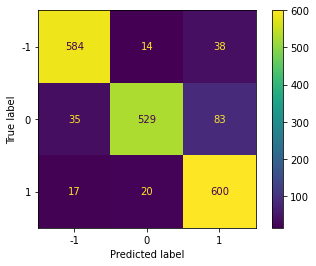

Test
0.6583333333333333


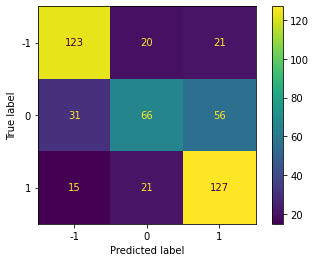

In [256]:
from sklearn import metrics
import matplotlib.pyplot as plt 

eval_model(model, X_train, X_test, y_train, y_test)

# Claramente hay mucho que pulir para aumentar el accuracy_score (desde la limpieza al etiquetado).
# De todas formas, leí varios artículos que decían que ro-BERT-a es bastante más preciso que hacer un modelo de Naive Bayes.

In [228]:
df_important.head()

,text,date,text_clean,target,text_stop_words_tokenize,text_stop_words_tokenize_stem
0,Scary Skull 3D Bling Swarovski Crystal iPhone ...,2022-09-04,scary skull 3d bling swarovski crystal iphone ...,0,"[scary, skull, 3d, bling, swarovski, crystal, ...","[scari, skull, 3d, bling, swarovski, crystal, ..."
1,Midnight Blue \n#apple #iphone14 https://t.co/...,2022-09-04,midnight blue apple iphone14 http,0,"[midnight, blue, apple, iphone14, http]","[midnight, blue, appl, iphone14, http]"
2,Part of me is looking forward to the #AppleEve...,2022-09-04,part of me is looking forward to the appleeven...,0,"[part, looking, forward, appleevent, wednesday...","[part, look, forward, appleev, wednesday, ., t..."
3,iPhone 14 Pro Early Trailer @hassantheshah \nF...,2022-09-04,iphone 14 pro early trailer @user feel free to...,0,"[iphone, 14, pro, early, trailer, @, user, fee...","[iphon, 14, pro, earli, trailer, @, user, feel..."
4,sell/buy/repair iPhones best price SG @ https:...,2022-09-04,sell/buy/repair iphones best price sg @ http s...,0,"[sell/buy/repair, iphones, best, price, sg, @,...","[sell/buy/repair, iphon, best, price, sg, @, h..."


In [223]:
df_important['text_stop_words_tokenize'] = df_important['text_clean'].apply(stop_words_tokenize)

In [117]:
# Modelo listo, pero como estos datos ya están etiquetados, los dejaré así por optimización de tiempo, y con el benchmarking mejoraré score y utilizaré modelo:

# Filtro mi DF con tweets negativos:
df_negative = df_important[df_important['target'] == -1]

# Hago una lista con las palabras tokenizadas y lemmatizadas de los tweets negativos:
negative_tweets_list = []
for l in df_negative['text_stop_words_tokenize']:
    extra_words = ['phone','iphones','apple','iphone','doesn','doesnt','bring','going','getting','having']
    for w in l:
        if w not in extra_words:
            negative_tweets_list.append(w)
            

# Paso mi lista de palabras negativas a un string con fines de visualización:
negative_tweets_list = ['charger' if re.search(r'char', x) else x for x in negative_tweets_list]

words_negative_tweets = str(negative_tweets_list)

# Frecuencia de palabras, aunque es redundante con la nube:
# fdist = FreqDist(negative_tweets_list)
# fdist.most_common()

In [ ]:
# Importo la paleta de colores que usaré para la nube:
from palettable.matplotlib import Inferno_6

# Defino parámetros de mi nube negativa:
stylecloud.gen_stylecloud(text = words_negative_tweets,
                          size = 1500,
                          icon_name = "fab fa-apple",
                          colors = '#FAB59F', # palette = 'matplotlib.Inferno_6',
                          background_color="#121435",
                          output_name = 'negativewords.jpg')

In [ ]:
# Filtro mi DF con tweets negativos:
df_positive = df_important[df_important['target'] == 1]

# Hago una lista con las palabras tokenizadas y lemmatizadas de los tweets negativos:
positive_tweets_list = []
for l in df_positive['text_stop_words_tokenize']:
    extra_words = ['phone','iphones','apple','iphone','doesn','doesnt','bring']
    for w in l:
        if w not in extra_words:
            positive_tweets_list.append(w)

# Paso mi lista de palabras negativas a un string con fines de visualización:
words_positive_tweets = str(positive_tweets_list)

# Frecuencia de palabras, aunque es redundante con la nube:
# fdist = FreqDist(positive_tweets_list)

In [ ]:
# Importo la paleta de colores que usaré para la nube:
from palettable.matplotlib import Inferno_13

# Defino parámetros de mi nube positiva:
stylecloud.gen_stylecloud(text = words_positive_tweets,
                          size = 1500,
                          icon_name = "fab fa-apple",
                          colors = '#FAF9F0', # palette = 'matplotlib.Inferno_6',
                          background_color="#121435",
                          output_name = 'positivewords.jpg')

In [280]:
text_charger = df_important[(df_important['text'].str.lower().str.contains('charger')) & (df_important['target'] == -1)][['text','target']]
text_charger

,text,target
2132,Apple needs to fix there fucking chargers inst...,-1
2925,#iPhone14 making a phone every year with littl...,-1
3440,@MKBHD With this step their sells will goes wa...,-1
5244,@Apple making #iphone every year with little t...,-1
8443,@Apple #iPhone14 making a phone every year wit...,-1
9947,#boycottApple not providing charger a basic ne...,-1
15265,Making a phone every year with little to no i...,-1
15981,"iPhone14 don’t come wit no charger, Apple out ...",-1
16948,"⚖️The Justice ministry of Brazil🇧🇷 said""Apple ...",-1
17258,Brazil bans apple due to lack of charger. \nUX...,-1


In [ ]:
print(text_charger.text[8463])

In [ ]:
print(text_charger.text[90177])

In [ ]:
print(text_charger.text[13086])

In [ ]:
print(text_charger.text[59538])

In [ ]:
print(text_charger.text[91037])

# BENCHMARKING GALAXY S22

In [261]:
df_samsung = pd.read_csv('./SamsungGalaxyS22.csv')

In [262]:
# Elimino columnas que no sirven:
df_samsung.drop(columns = ['Unnamed: 0','username','description', 'following','totaltweets','hashtags'], inplace = True)

# Elimino duplicados:
df_samsung.drop_duplicates(subset=['text'], keep='first', inplace = True)

In [264]:
df_samsung.head()

,creation,location,followers,retweetcount,text,text_clean
0,2022-09-17 19:45:26+00:00,NaN,66,298,It’s a Bora Purple world. @BTS_twt \n#GalaxyxB...,it’s a bora purple world. @user galaxyxbts gal...
3,2022-09-17 18:29:37+00:00,NaN,28,4,Did you know you get up to 4 months free of Yo...,did you know you get up to 4 months free of yo...
4,2022-09-17 18:28:10+00:00,NaN,28,35,The world's #1 couple. Introducing the world's...,the world's 1 couple. introducing the world's ...
5,2022-09-17 18:28:01+00:00,NaN,28,15,Don't tell me you dip them in milkshakes 🥤😬 an...,don't tell me you dip them in milkshakes and ...
6,2022-09-17 18:19:38+00:00,India,112,2,"Never buying Samsung phone again, bought 2 Sam...","never buying samsung phone again, bought 2 sam..."


In [265]:
df_samsung['text_clean'] = df_samsung['text'].apply(hashtags)

In [266]:
df_samsung['text_clean'] = df_samsung['text_clean'].apply(saltos_linea)

In [267]:
df_samsung['text_clean'] = df_samsung['text_clean'].apply(usuario_url)

In [268]:
df_samsung['text_clean'] = df_samsung['text_clean'].apply(clean)

In [271]:
df_samsung['sent_score'] = df_samsung['text_clean'].apply(tweet_proc)

In [278]:
df_samsung['neg_score'] = df_samsung['sent_score'].apply(neg_score)

df_samsung['neu_score'] = df_samsung['sent_score'].apply(neu_score)

df_samsung['pos_score'] = df_samsung['sent_score'].apply(pos_score)

df_samsung['target'] = np.where(df_samsung['pos_score'] > 0.65, 1,
                              np.where(df_samsung['neg_score'] > 0.65, -1,
                                       0))

In [279]:
df_samsung['text_stop_words_tokenize'] = df_samsung['text_clean'].apply(stop_words_tokenize)


df_samsung['text_stop_words_tokenize_stem'] = df_samsung['text_stop_words_tokenize'].apply(stem)

In [ ]:
# Filtro mi DF con tweets negativos:
df_samsung_neg = df_samsung[df_samsung['target'] == -1]

# Hago una lista con las palabras tokenizadas y lemmatizadas de los tweets negativos:
negative_tweets_list_samsung = []
for l in df_samsung_neg['text_stop_words_tokenize_stem']:
    extra_words = ['phone','iphones','apple','iphone','doesn','doesnt','bring','galaxy','samsung']
    for w in l:
        if w not in extra_words:
            negative_tweets_list_samsung.append(w)

# Paso mi lista de palabras negativas a un string con fines de visualización:
words_negative_tweets_samsung = str(negative_tweets_list_samsung)

# Importo la paleta de colores que usaré para la nube:
from palettable.matplotlib import Inferno_6

# Defino parámetros de mi nube negativa:
stylecloud.gen_stylecloud(text = words_negative_tweets_samsung,
                          size = 1500,
                          icon_name = "fab fa-android",
                          colors = '#FF5722', 
                          # palette = 'scientific.sequential.LaJolla_13',
                          background_color="#FAF9F0",
                          output_name = 'negativewordssamsung.jpg')

In [ ]:
# Filtro mi DF con tweets negativos:
df_samsung_pos = df_samsung[df_samsung['target'] == 1]

# Hago una lista con las palabras tokenizadas y lemmatizadas de los tweets negativos:
positive_tweets_list_samsung = []
for l in df_samsung_pos['text_stop_words_tokenize_stem']:
    extra_words = ['phone','iphones','apple','iphone','doesn','doesnt','bring','galaxy','samsung']
    for w in l:
        if w not in extra_words:
            positive_tweets_list_samsung.append(w)

# Paso mi lista de palabras negativas a un string con fines de visualización:
words_positive_tweets_samsung = str(positive_tweets_list_samsung)

# Importo la paleta de colores que usaré para la nube:
from palettable.matplotlib import Inferno_13

# Defino parámetros de mi nube positiva:
stylecloud.gen_stylecloud(text = words_positive_tweets_samsung,
                          size = 1500,
                          icon_name = "fab fa-android",
                          # palette = 'scientific.sequential.Acton_20', 
                          colors = '#121435',
                          background_color="#FAF9F0",
                          output_name = 'positivewordssamsung.jpg')